In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

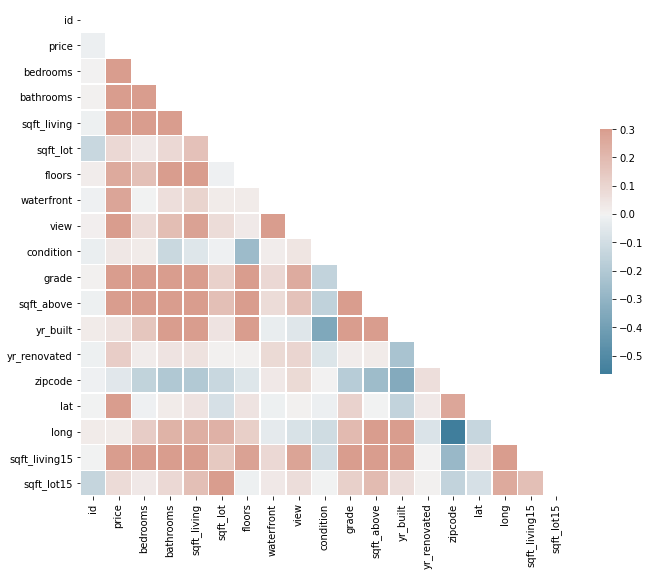

In [45]:
df= pd.read_csv('data/kc_house_data.csv')
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [47]:
df=df[['price','sqft_living','bedrooms','bathrooms','floors','grade','condition','yr_built','yr_renovated','waterfront']]
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,3,1955,0.0,NaN
1,538000.0,2570,3,2.25,2.0,7,3,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,3,1933,NaN,0.0
3,604000.0,1960,4,3.00,1.0,7,5,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,3,1987,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,3.0,8,3,2009,0.0,0.0
21593,400000.0,2310,4,2.50,2.0,8,3,2014,0.0,0.0
21594,402101.0,1020,2,0.75,2.0,7,3,2009,0.0,0.0
21595,400000.0,1600,3,2.50,2.0,8,3,2004,0.0,NaN


In [48]:
df.isnull().sum()

price              0
sqft_living        0
bedrooms           0
bathrooms          0
floors             0
grade              0
condition          0
yr_built           0
yr_renovated    3842
waterfront      2376
dtype: int64

In [49]:
df['waterfront'] = df['waterfront'].fillna(0)

In [50]:
df.isnull().sum()
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

price           0
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
grade           0
condition       0
yr_built        0
yr_renovated    0
waterfront      0
dtype: int64

In [51]:
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  int64  
 6   condition    21597 non-null  int64  
 7   yr_built     21597 non-null  int64  
 8   renovated    21597 non-null  float64
 9   waterfront   21597 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [52]:
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [53]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age
0,221900.0,1180,3,1.00,1.0,7,3,0.0,0.0,60
1,538000.0,2570,3,2.25,2.0,7,3,1991.0,0.0,64
2,180000.0,770,2,1.00,1.0,6,3,0.0,0.0,82
3,604000.0,1960,4,3.00,1.0,7,5,0.0,0.0,50
4,510000.0,1680,3,2.00,1.0,8,3,0.0,0.0,28


In [54]:
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses,new_houses
price,1.000000,0.701917,0.308787,0.525906,0.256804,0.667951,0.036056,-0.117543,0.264306,-0.053953,-0.128119,0.127512
sqft_living,0.701917,1.000000,0.578212,0.755758,0.353953,0.762779,-0.059445,-0.050829,0.104637,-0.318152,-0.267367,0.263504
bedrooms,0.308787,0.578212,1.000000,0.514508,0.177944,0.356563,0.026496,-0.017635,-0.002127,-0.155670,-0.090147,0.089761
bathrooms,0.525906,0.755758,0.514508,1.000000,0.502582,0.665838,-0.126479,-0.046742,0.063629,-0.507173,-0.438120,0.432903
floors,0.256804,0.353953,0.177944,0.502582,1.000000,0.458794,-0.264075,-0.003713,0.020797,-0.489193,-0.600415,0.594597
grade,0.667951,0.762779,0.356563,0.665838,0.458794,1.000000,-0.146896,-0.015259,0.082818,-0.447865,-0.361087,0.354740
condition,0.036056,-0.059445,0.026496,-0.126479,-0.264075,-0.146896,1.000000,0.055383,0.016648,0.361592,0.365741,-0.360910
renovated,-0.117543,-0.050829,-0.017635,-0.046742,-0.003713,-0.015259,0.055383,1.000000,-0.074267,-0.202837,-0.112708,0.110413
waterfront,0.264306,0.104637,-0.002127,0.063629,0.020797,0.082818,0.016648,-0.074267,1.000000,0.024487,0.021926,-0.020664
age,-0.053953,-0.318152,-0.155670,-0.507173,-0.489193,-0.447865,0.361592,-0.202837,0.024487,1.000000,0.703538,-0.695668


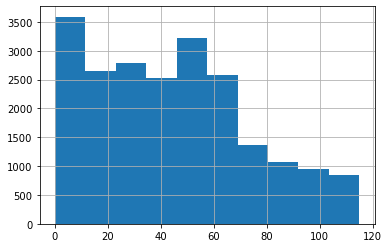

In [55]:
df.age.hist()
df['old_houses']=df['age']>20
df['new_houses']=df['age']<20
df.corr()

In [56]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses,new_houses
0,221900.0,1180,3,1.00,1.0,7,3,1,0.0,60,True,False
1,538000.0,2570,3,2.25,2.0,7,3,0,0.0,64,True,False
2,180000.0,770,2,1.00,1.0,6,3,1,0.0,82,True,False
3,604000.0,1960,4,3.00,1.0,7,5,1,0.0,50,True,False
4,510000.0,1680,3,2.00,1.0,8,3,1,0.0,28,True,False


In [57]:
df = df.drop(columns='old_houses', axis=1)

In [58]:
df.drop(df[df['new_houses'] == False].index, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5629 entries, 5 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        5629 non-null   float64
 1   sqft_living  5629 non-null   int64  
 2   bedrooms     5629 non-null   int64  
 3   bathrooms    5629 non-null   float64
 4   floors       5629 non-null   float64
 5   grade        5629 non-null   int64  
 6   condition    5629 non-null   int64  
 7   renovated    5629 non-null   int32  
 8   waterfront   5629 non-null   float64
 9   age          5629 non-null   int64  
 10  new_houses   5629 non-null   bool   
dtypes: bool(1), float64(4), int32(1), int64(5)
memory usage: 467.3 KB


In [60]:
df['new_houses'] = df['new_houses'].astype('float64')

In [61]:
df['renovated'] = df['renovated'].astype('bool')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,new_houses
5,1230000.0,5420,4,4.5,1.0,11,3,True,0.0,14,1.0
9,323000.0,1890,3,2.5,2.0,7,3,True,0.0,12,1.0
29,719000.0,2570,4,2.5,2.0,8,3,True,0.0,10,1.0
30,580500.0,2320,3,2.5,2.0,8,3,True,0.0,12,1.0
31,280000.0,1190,2,1.5,3.0,7,3,True,0.0,10,1.0


In [62]:
df.drop(df[df['renovated'] == False].index, inplace=True)
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,new_houses
5,1230000.0,5420,4,4.5,1.0,11,3,True,0.0,14,1.0
9,323000.0,1890,3,2.5,2.0,7,3,True,0.0,12,1.0
29,719000.0,2570,4,2.5,2.0,8,3,True,0.0,10,1.0
30,580500.0,2320,3,2.5,2.0,8,3,True,0.0,12,1.0
31,280000.0,1190,2,1.5,3.0,7,3,True,0.0,10,1.0


In [63]:
df['renovated'] = df['renovated'].astype('float64')

In [64]:
value_counts_bed=df['bedrooms'].value_counts()
to_remove = value_counts_bed[value_counts_bed <=50].index
df = df[~df.bedrooms.isin(to_remove)]

In [65]:
value_counts_bath=df['bathrooms'].value_counts()
to_remove_bath = value_counts_bath[value_counts_bath <=80].index
df = df[~df.bathrooms.isin(to_remove_bath)]

In [66]:
value_counts_floors=df['floors'].value_counts()
to_remove_floor = value_counts_floors[value_counts_floors <=10].index
df = df[~df.floors.isin(to_remove_floor)]

In [67]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,new_houses
9,323000.0,1890,3,2.5,2.0,7,3,1.0,0.0,12,1.0
29,719000.0,2570,4,2.5,2.0,8,3,1.0,0.0,10,1.0
30,580500.0,2320,3,2.5,2.0,8,3,1.0,0.0,12,1.0
31,280000.0,1190,2,1.5,3.0,7,3,1.0,0.0,10,1.0
39,605000.0,2620,4,2.5,2.0,8,3,1.0,0.0,19,1.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5226 entries, 9 to 21595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        5226 non-null   float64
 1   sqft_living  5226 non-null   int64  
 2   bedrooms     5226 non-null   int64  
 3   bathrooms    5226 non-null   float64
 4   floors       5226 non-null   float64
 5   grade        5226 non-null   int64  
 6   condition    5226 non-null   int64  
 7   renovated    5226 non-null   float64
 8   waterfront   5226 non-null   float64
 9   age          5226 non-null   int64  
 10  new_houses   5226 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 489.9 KB


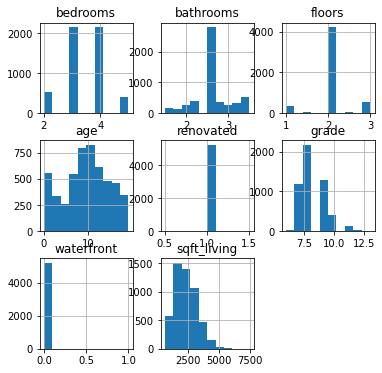

In [69]:
df[['bedrooms', 'bathrooms', 'floors', 'age','renovated','grade','waterfront','sqft_living']].hist(figsize  = [6, 6]); 

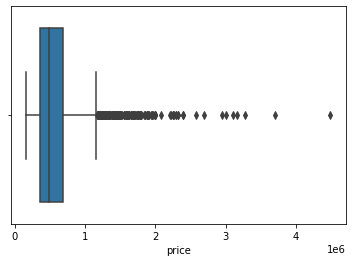

In [70]:
ax = sns.boxplot(x="price", data=df)

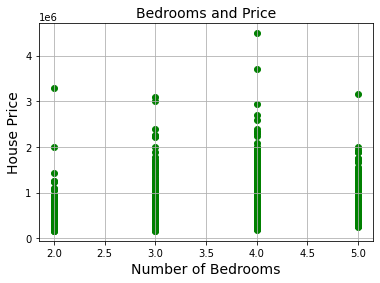

In [71]:
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.title('Bedrooms and Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

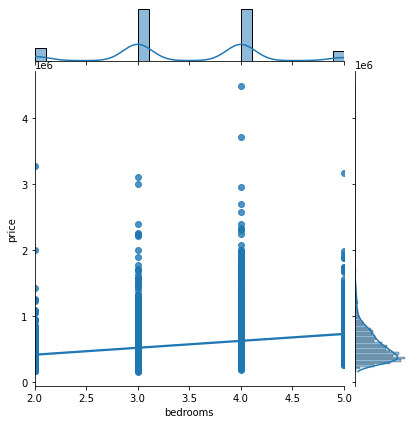

In [72]:
sns.jointplot(data=df, x="bedrooms", y="price", kind="reg")

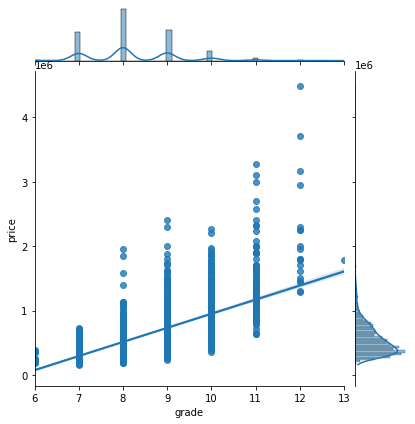

In [73]:
sns.jointplot(data=df, x="grade", y="price", kind="reg")

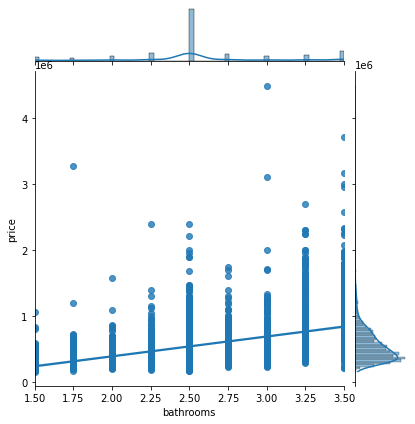

In [74]:
sns.jointplot(data=df, x="bathrooms", y="price", kind="reg")

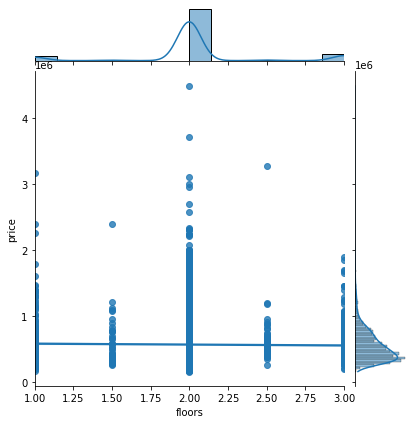

In [75]:
sns.jointplot(data=df, x="floors", y="price", kind="reg")

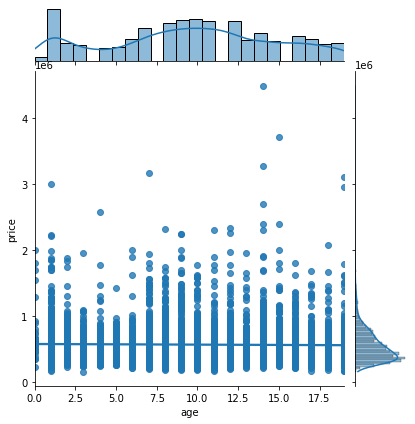

In [76]:
sns.jointplot(data=df, x="age", y="price", kind="reg")

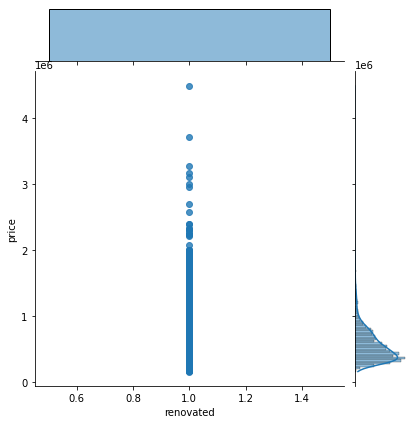

In [77]:
sns.jointplot(data=df, x="renovated", y="price", kind="reg")

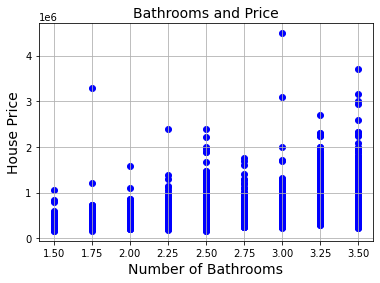

In [78]:
plt.scatter(df['bathrooms'], df['price'], color='blue')
plt.title('Bathrooms and Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

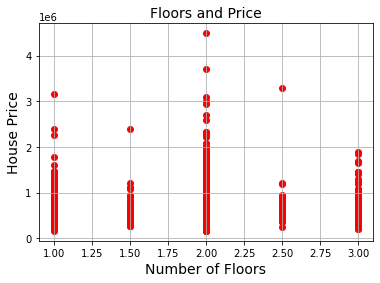

In [79]:
plt.scatter(df['floors'], df['price'], color='red')
plt.title('Floors and Price', fontsize=14)
plt.xlabel('Number of Floors', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

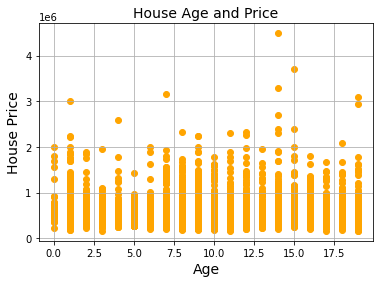

In [80]:
plt.scatter(df['age'], df['price'], color='orange')
plt.title('House Age and Price', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

## Model 1

In [81]:
def tts_model(df):
    y = df['price']
    X = df.drop(columns=['price'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Test RMSE:', np.sqrt(mse_test))
    print('Train RMSE:', np.sqrt(mse_train))
    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)

    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

In [82]:
model = tts_model(df)

Test RMSE: 158185.4016785592
Train RMSE: 191447.54505771238
Training Score: 0.62
Test Score: 0.7
Coefficients: [ 1.43559562e+02 -6.20506261e+04  6.31342037e+04  2.87313458e+04
  1.35502306e+05  8.21222585e+04  2.91038305e-10  9.66905970e+05
 -2.06759822e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     844.9
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:02   Log-Likelihood:                -56770.
No. Observations:                4180   AIC:                         1.136e+05
Df Residuals:                    4171   BIC:                         1.136e+05
Df Model:                           8                                         
Covariance Typ

<Figure size 864x576 with 0 Axes>

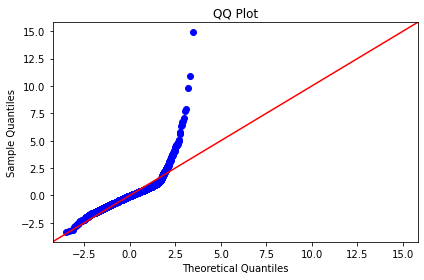

In [83]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()

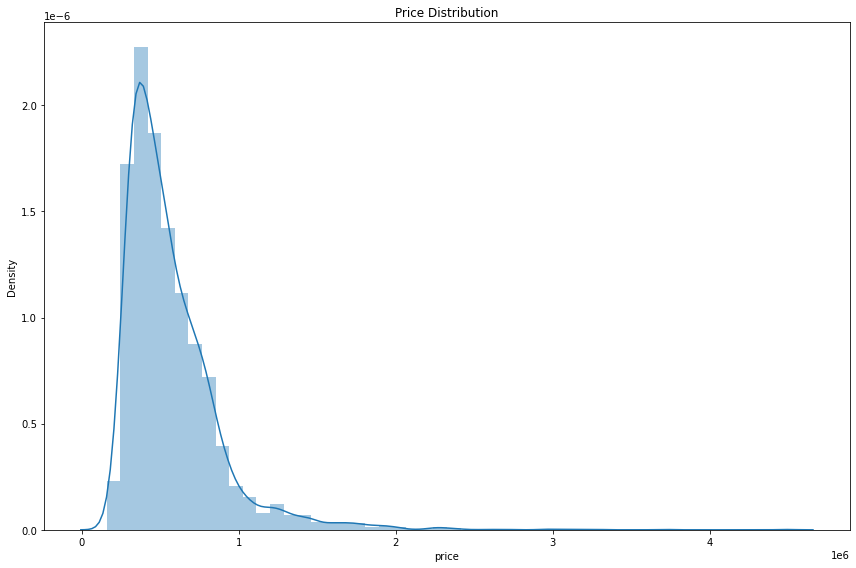

In [84]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

## Model 2 (Normalizing Price)

In [85]:
df = df[df['price'] <= 1000001]

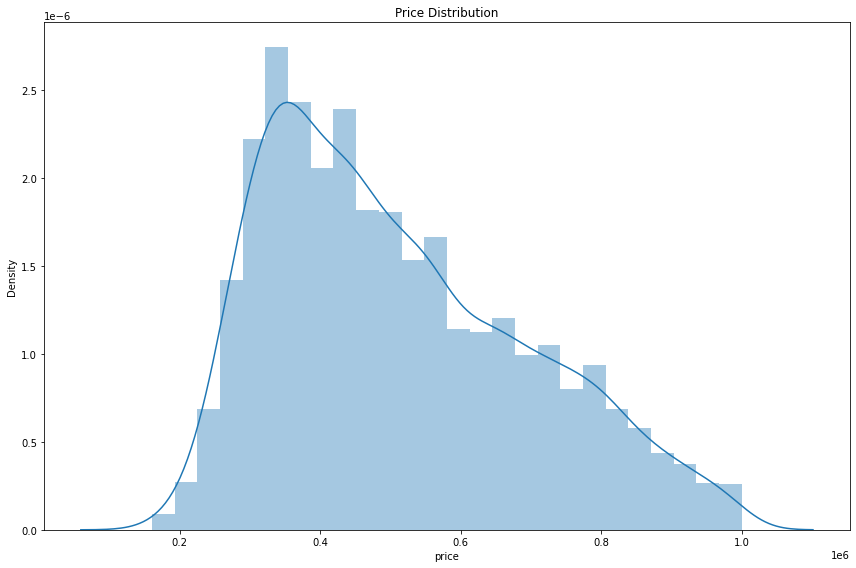

In [86]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

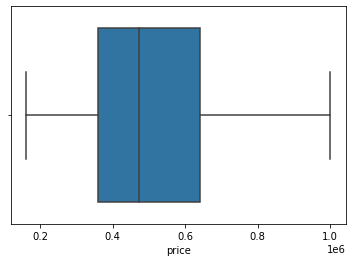

In [87]:
ax = sns.boxplot(x="price", data=df)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 9 to 21595
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4886 non-null   float64
 1   sqft_living  4886 non-null   int64  
 2   bedrooms     4886 non-null   int64  
 3   bathrooms    4886 non-null   float64
 4   floors       4886 non-null   float64
 5   grade        4886 non-null   int64  
 6   condition    4886 non-null   int64  
 7   renovated    4886 non-null   float64
 8   waterfront   4886 non-null   float64
 9   age          4886 non-null   int64  
 10  new_houses   4886 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 458.1 KB


In [89]:
model = tts_model(df)

Test RMSE: 121541.65014075737
Train RMSE: 119446.85223263105
Training Score: 0.58
Test Score: 0.59
Coefficients: [ 1.04802166e+02 -3.93833600e+04  2.76160895e+04  3.04237070e+04
  9.52158676e+04  5.72742514e+04  3.20142135e-10  4.01534658e+05
 -1.28020115e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     663.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:03   Log-Likelihood:                -51232.
No. Observations:                3908   AIC:                         1.025e+05
Df Residuals:                    3899   BIC:                         1.025e+05
Df Model:                           8                                         
Covariance T

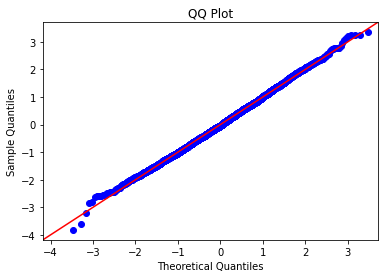

In [90]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 3 (Multicollinearity)

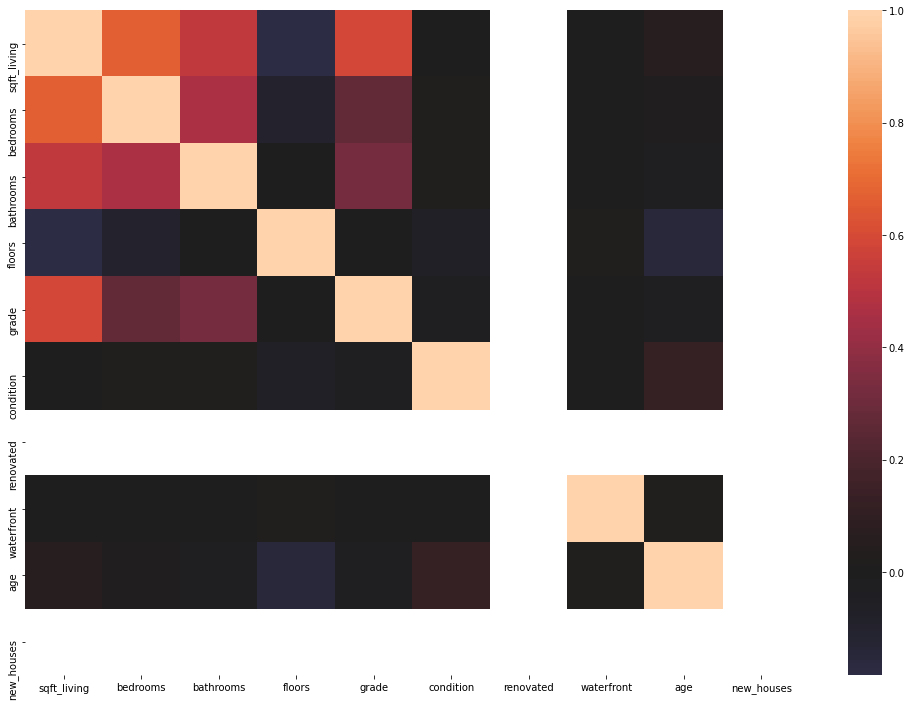

In [91]:
X = df.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), center=0)
plt.tight_layout()
plt.show()

In [92]:
abs(X.corr()) >= .7

,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,new_houses
sqft_living,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False
renovated,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,False,True,False
new_houses,False,False,False,False,False,False,False,False,False,False


In [93]:
corr_df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns in a  column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# Set index to pairs
corr_df.set_index(['pairs'], inplace = True)

# Drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename correlation column to cc
corr_df.columns = ['cc']

# Drop duplicates
corr_df.drop_duplicates(inplace=True)

In [94]:
corr_df[(corr_df.cc>.70) & (corr_df.cc <1)]

,cc
pairs,


In [95]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

{'sqft_living': 3.0271235091901207,
 'bedrooms': 1.929797032268619,
 'bathrooms': 1.4681665122367418,
 'floors': 1.098633626914896,
 'grade': 1.6575966686122547,
 'condition': 1.018848142761984,
 'renovated': 0.0,
 'waterfront': 1.0012767819975892,
 'age': 1.043263250301904,
 'new_houses': 0.0}

In [96]:
tts_model(df)

Test RMSE: 121541.65014075737
Train RMSE: 119446.85223263105
Training Score: 0.58
Test Score: 0.59
Coefficients: [ 1.04802166e+02 -3.93833600e+04  2.76160895e+04  3.04237070e+04
  9.52158676e+04  5.72742514e+04  3.20142135e-10  4.01534658e+05
 -1.28020115e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     663.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:04   Log-Likelihood:                -51232.
No. Observations:                3908   AIC:                         1.025e+05
Df Residuals:                    3899   BIC:                         1.025e+05
Df Model:                           8                                         
Covariance T

## Model 4 (Removing Insignificant Features)

In [97]:
df = df.drop(columns=['renovated'], axis=1)
df = df.drop(columns=['condition'], axis=1)
df = df.drop(columns=['age'], axis=1)

In [98]:
tts_model(df)

Test RMSE: 120868.80911846424
Train RMSE: 119791.78202469347
Training Score: 0.57
Test Score: 0.59
Coefficients: [ 1.03749071e+02 -3.92581817e+04  2.93134659e+04  3.12745101e+04
  9.53810749e+04  4.02194745e+05  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     875.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:04   Log-Likelihood:                -51243.
No. Observations:                3908   AIC:                         1.025e+05
Df Residuals:                    3901   BIC:                         1.025e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                        

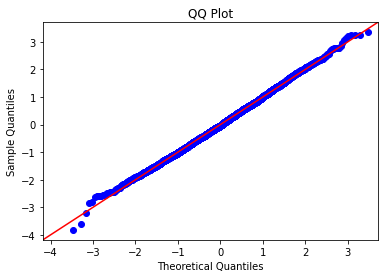

In [99]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 5 Adjusting for Outliers

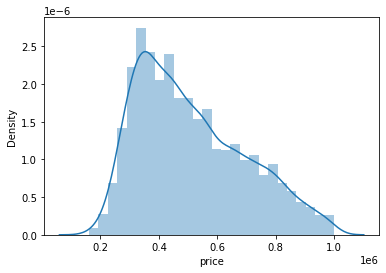

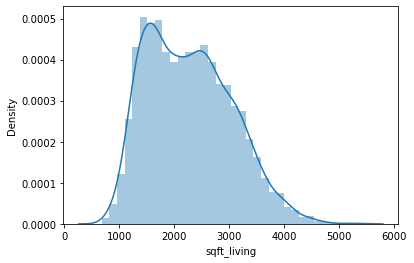

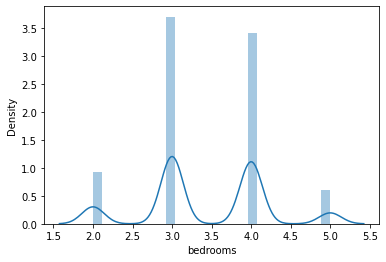

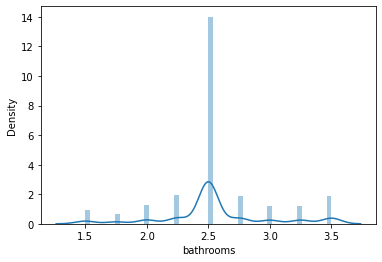

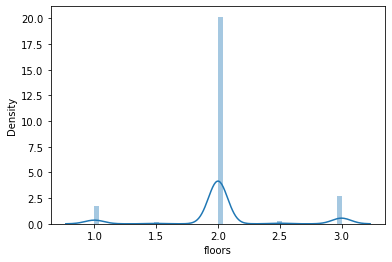

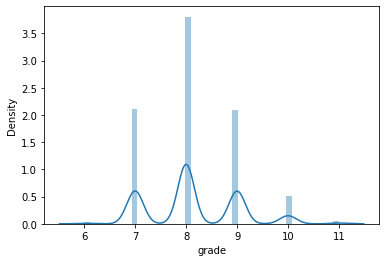

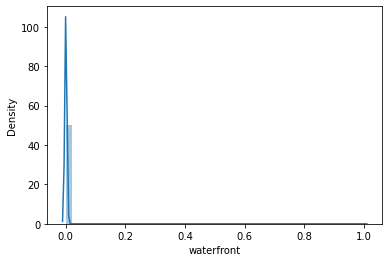

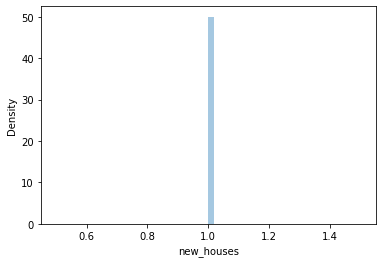

In [100]:
#View distribution plots for all columns
for col in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[col])

In [101]:
df = df[df['sqft_living'] < 5000]
df = df[df['bathrooms'] < 4.0]
df = df[df['floors'] < 3.5]

In [102]:
tts_model(df)

Test RMSE: 119377.71580749527
Train RMSE: 119996.21813766079
Training Score: 0.58
Test Score: 0.57
Coefficients: [ 1.05466401e+02 -4.28364759e+04  3.42255130e+04  3.42669072e+04
  9.54513923e+04  3.99185403e+05  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     898.3
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:52:05   Log-Likelihood:                -51224.
No. Observations:                3906   AIC:                         1.025e+05
Df Residuals:                    3899   BIC:                         1.025e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                        

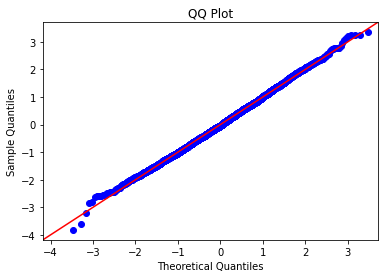

In [103]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()